In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
occ = pd.read_csv('officialcharts_with_stats.csv')
fs = ['year', 'month', 'position', 'beatdiff_range', 'timbre_1_percentile', 'timbre_1_max', 'timbre_1_std', 'timbre_1_mean',
      'timbre_1_median', 'timbre_2_percentile', 'timbre_2_max', 'timbre_2_mean','timbre_2_range',
      'timbre_3_mean', 'timbre_3_median', 'timbre_3_min', 'timbre_3_std', 'timbre_3_var', 
      'timbre_2_percentile','timbre_4_percentile', 'timbre_5_mean', 'timbre_5_std', 'timbre_6_median',
      'timbre_6_range', 'timbre_6_var', 'timbre_7_var', 'timbre_8_median', 'timbre_9_kurtosis',
       'timbre_9_max', 'timbre_9_median', 'timbre_11_percentile', 'timbre_11_var', 'timbre_12_kurtosis',
       'timbre_12_median', 'timbre_12_mean', 'beatdiff_percentile', 'beatdiff_std', 'beatdiff_var'
     ]
occ = occ[fs]
occ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 38 columns):
year                    675 non-null float64
month                   675 non-null float64
position                675 non-null float64
beatdiff_range          675 non-null float64
timbre_1_percentile     675 non-null float64
timbre_1_max            675 non-null float64
timbre_1_std            675 non-null float64
timbre_1_mean           675 non-null float64
timbre_1_median         675 non-null float64
timbre_2_percentile     675 non-null float64
timbre_2_max            675 non-null float64
timbre_2_mean           675 non-null float64
timbre_2_range          675 non-null float64
timbre_3_mean           675 non-null float64
timbre_3_median         675 non-null float64
timbre_3_min            675 non-null float64
timbre_3_std            675 non-null float64
timbre_3_var            675 non-null float64
timbre_2_percentile     675 non-null float64
timbre_4_percentile     675 non-null flo

In [15]:
def hit_or_not(row, cutoff):
    if row['position'] <= cutoff:
        return 1
    else:
        return 0

d1 = occ[((occ['position'] <= 10) | (occ['position'] >= 30))].copy()
d2 = occ[((occ['position'] <= 10) | (occ['position'] >= 20))].copy()
d3 = occ.copy()

d1['hit'] = d1.apply(lambda row: hit_or_not(row, 10), axis=1)
d2['hit'] = d2.apply(lambda row: hit_or_not(row, 10), axis=1)
d3['hit'] = d3.apply(lambda row: hit_or_not(row, 20), axis=1)

print("D1:")
print("Hits: " + str(d1['hit'].sum()))
print("Non-hits: " + str(d1['hit'].count() - d1['hit'].sum()) + "\n")

print("D2:")
print("Hits: " + str(d2['hit'].sum()))
print("Non-hits: " + str(d2['hit'].count() - d2['hit'].sum()) + "\n" )

print("D3:")
print("Hits: " + str(d3['hit'].sum()))
print("Non-hits: " + str(d3['hit'].count() - d3['hit'].sum()) + "\n")

print(d1.info(), '\n')
print(d2.info(), '\n')
print(d3.info(), '\n')

D1:
Hits: 249
Non-hits: 157

D2:
Hits: 249
Non-hits: 303

D3:
Hits: 388
Non-hits: 287

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 674
Data columns (total 39 columns):
year                    406 non-null float64
month                   406 non-null float64
position                406 non-null float64
beatdiff_range          406 non-null float64
timbre_1_percentile     406 non-null float64
timbre_1_max            406 non-null float64
timbre_1_std            406 non-null float64
timbre_1_mean           406 non-null float64
timbre_1_median         406 non-null float64
timbre_2_percentile     406 non-null float64
timbre_2_max            406 non-null float64
timbre_2_mean           406 non-null float64
timbre_2_range          406 non-null float64
timbre_3_mean           406 non-null float64
timbre_3_median         406 non-null float64
timbre_3_min            406 non-null float64
timbre_3_std            406 non-null float64
timbre_3_var            406 non-null float6

ValueError: x and y must be the same size

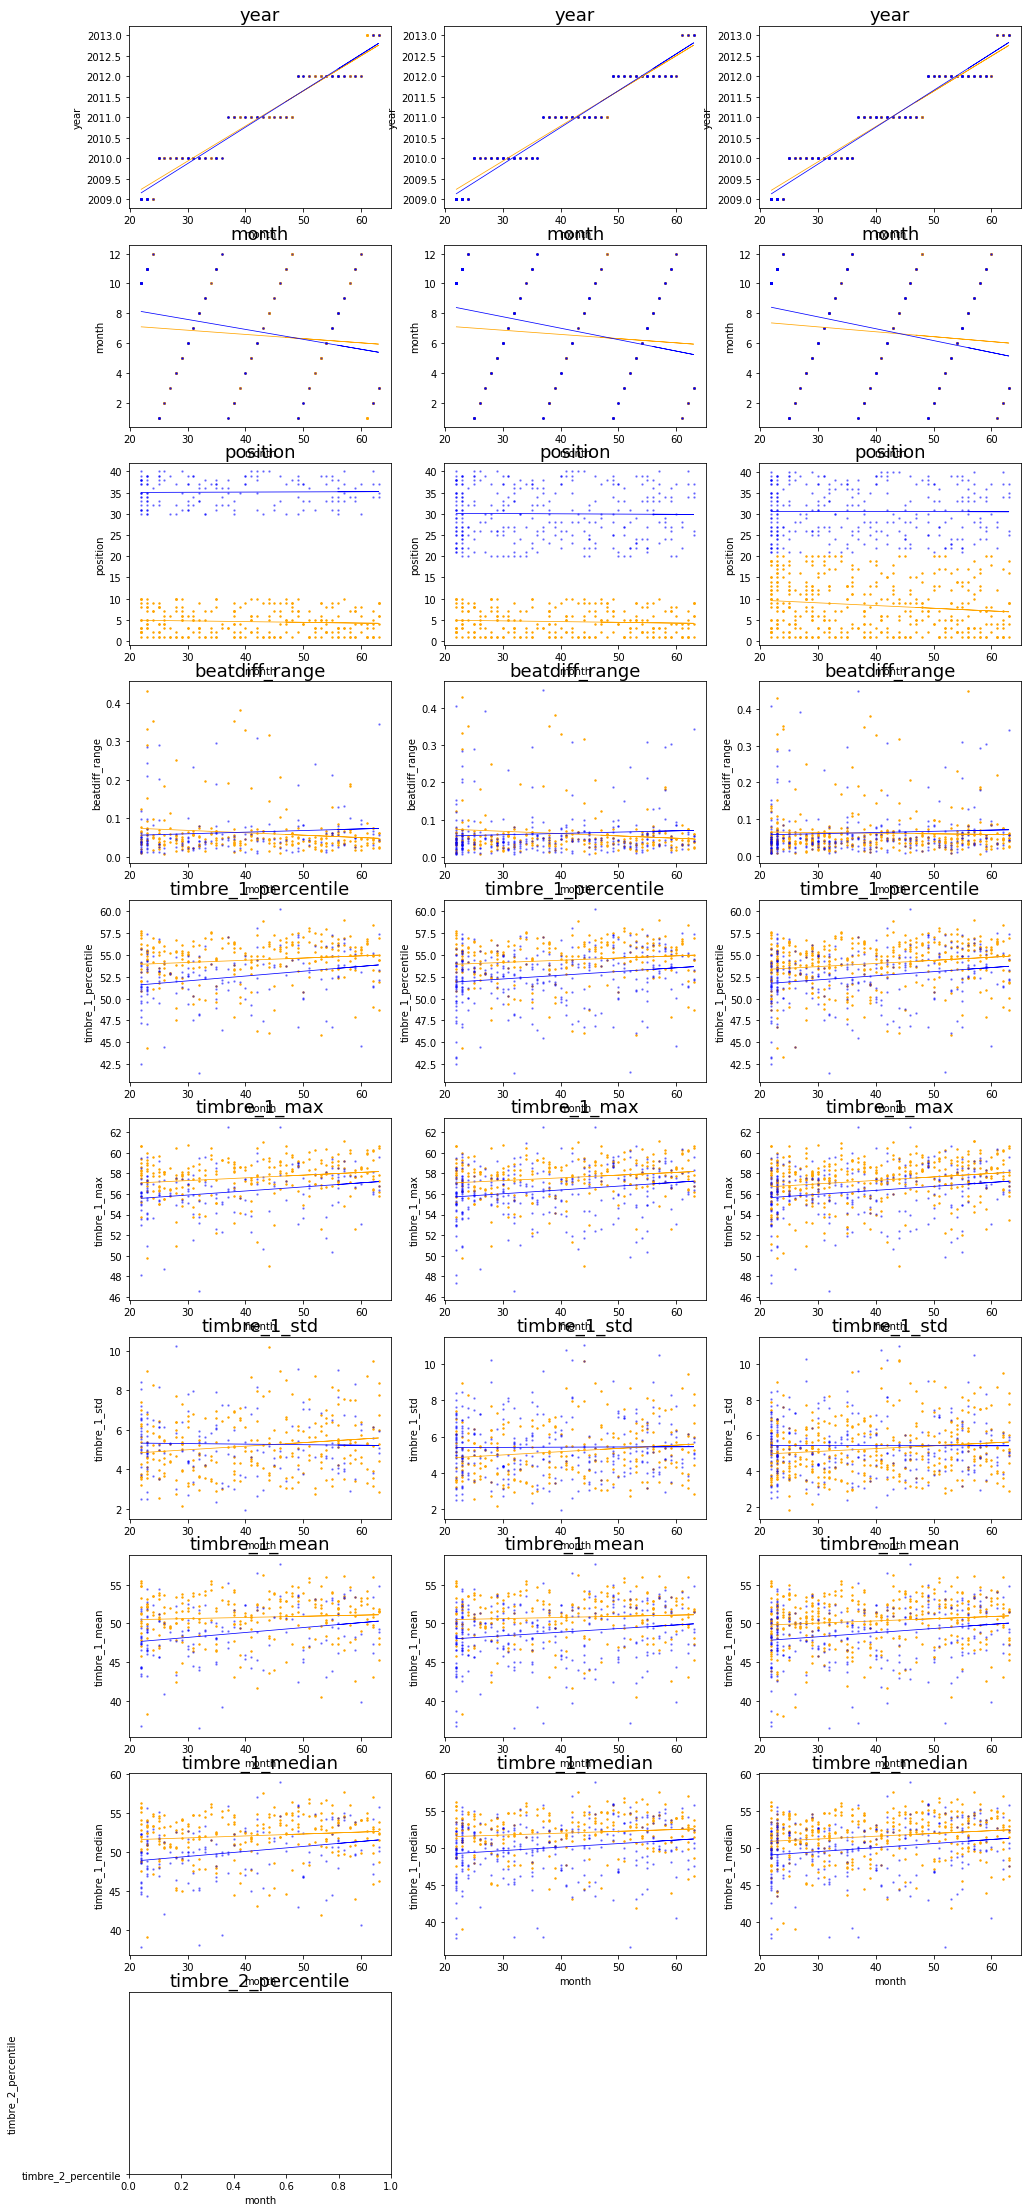

In [16]:
def plot(key, df):
    hits = df[df['hit'] == 1]
    hit_years = hits['year'] - min(df['year']) + 1
    hit_months = (12 * hit_years) + hits['month']
    non_hits = df[df['hit'] == 0]
    non_hit_years = non_hits['year'] - min(df['year']) + 1 
    non_hit_months = (12 * non_hit_years) + non_hits['month']
    Y_hits = [n for n in hits[key]]
    Y_non_hits = [n for n in non_hits[key]]
    plt.title(key, fontsize=18)
    plt.xlabel("month")
    plt.ylabel(key)
    plt.scatter(hit_months, Y_hits, s=2, color='orange')
    z = np.polyfit(hit_months, Y_hits, 1)
    p = np.poly1d(z)
    plt.plot(hit_months,p(hit_months),"orange", linewidth=0.75)
    plt.scatter(non_hit_months, Y_non_hits, s=2, color='blue', alpha=0.4)
    z = np.polyfit(non_hit_months, Y_non_hits, 1)
    p = np.poly1d(z)
    plt.plot(non_hit_months,p(non_hit_months),"blue", linewidth=0.75)
    
num_fig_rows = len(occ.keys())
plt.figure(figsize=(16, 4*num_fig_rows))
plot_counter = 1
for key in d1.keys():
    plt.subplot(num_fig_rows, 3, plot_counter)
    plot(key, d1)
    plot_counter += 1
    plt.subplot(num_fig_rows, 3, plot_counter)
    plot(key, d2)
    plot_counter += 1
    plt.subplot(num_fig_rows, 3, plot_counter)
    plot(key, d3)
    print("%s/%s" % (str(plot_counter).rjust(len(occ.keys())), len(occ.keys())*3), end='\r')
    plot_counter += 1
        
plt.tight_layout()
plt.savefig('hit_or_no_hit_fs.pdf', format='pdf')
plt.show()

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [21]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

d1_pred = d1.copy()
d2_pred = d2.copy()
d3_pred = d3.copy()

del d1_pred['position']
del d2_pred['position']
del d3_pred['position']

d1_features = d1_pred.drop('hit', axis=1)
d1_targets = d1_pred['hit']
d2_features = d2_pred.drop('hit', axis=1)
d2_targets = d2_pred['hit']
d3_features = d3_pred.drop('hit', axis=1)
d3_targets = d3_pred['hit']
d1_nb_model = gnb.fit(d1_features, d1_targets)
d2_nb_model = gnb.fit(d2_features, d2_targets)
d3_nb_model = gnb.fit(d3_features, d3_targets)
print("Number of mislabeled points out of a total %d points : %d" % (d1_features.shape[0],(d1_targets != d1_nb_model.predict(d1_features)).sum()))
print("Number of mislabeled points out of a total %d points : %d" % (d2_features.shape[0],(d2_targets != d2_nb_model.predict(d2_features)).sum()))
print("Number of mislabeled points out of a total %d points : %d" % (d3_features.shape[0],(d3_targets != d3_nb_model.predict(d3_features)).sum()))

Number of mislabeled points out of a total 406 points : 135
Number of mislabeled points out of a total 552 points : 226
Number of mislabeled points out of a total 675 points : 258


Confusion matrix, without normalization
[[ 84  61]
 [ 73 188]]


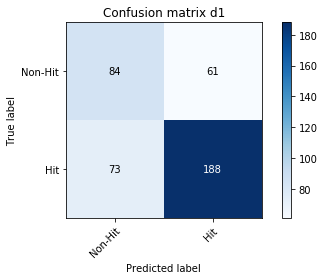

D1: best model accuracy: 0.850000, avg_model_accuracy: 0.645128
D2: best model accuracy: 0.745455, avg_model_accuracy: 0.589175
D3: best model accuracy: 0.746269, avg_model_accuracy: 0.602480


In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix  
from sklearn.model_selection import KFold

def naive_bayes_10CV(df_features, df_target):
    gnb = GaussianNB()
    n_splits = 10
    kf = KFold(n_splits=n_splits, shuffle=True)
    total_model_acc = 0
    best_model_acc = 0
    for train_idx, test_idx in kf.split(df_features):
        X_train, X_test = df_features.iloc[train_idx], df_features.iloc[test_idx]
        Y_train, Y_test = df_target.iloc[train_idx], df_target.iloc[test_idx]
        df_nb_model = gnb.fit(X_train, Y_train)
        predicted_values = df_nb_model.predict(X_test)
        number_correct_predictions = (Y_test == predicted_values).sum()
        model_acc = float(number_correct_predictions)/len(Y_test)
        if model_acc > best_model_acc:
            best_model = df_nb_model
            best_model_acc = model_acc
            cm = confusion_matrix(Y_test, predicted_values)
        total_model_acc += model_acc
        
    avg_model_acc = float(total_model_acc)/n_splits
    return best_model, best_model_acc, avg_model_acc, cm

avg_accuracies = [0,0,0]
best_accuracies = [0,0,0]
best_model = [None,None,None]
cm_arr = [None, None, None]
num_iter = 10

for i in range(num_iter):
    best_model_d1, best_model_acc_d1, avg_model_acc_d1, cm1 = naive_bayes_10CV(d1_features, d1_targets)
    best_model_d2, best_model_acc_d2, avg_model_acc_d2, cm2 = naive_bayes_10CV(d2_features, d2_targets)
    best_model_d3, best_model_acc_d3, avg_model_acc_d3, cm3 = naive_bayes_10CV(d3_features, d3_targets)
    avg_accuracies[0] += avg_model_acc_d1
    avg_accuracies[1] += avg_model_acc_d2 
    avg_accuracies[2] += avg_model_acc_d3
    if best_model_acc_d1 > best_accuracies[0]: 
        best_accuracies[0] = best_model_acc_d1
        best_model[0] = best_model_d1
        cm_arr[0] = cm1
    if best_model_acc_d2 > best_accuracies[1]: 
        best_accuracies[1] = best_model_acc_d2
        best_model[1] = best_model_d2
        cm_arr[1] = cm2
    if best_model_acc_d3 > best_accuracies[2]: 
        best_accuracies[2] = best_model_acc_d3
        best_model[2] = best_model_d3
        cm_arr[2] = cm3
        
avg_accuracies = [n/num_iter for n in avg_accuracies]
best_model_prediction = best_model[0].predict(d1_features)
cm = confusion_matrix(best_model_prediction, d1_targets)
plot_confusion_matrix(cm, ["Non-Hit","Hit"], title="Confusion matrix d1")
plt.show()

print("D1: best model accuracy: %f, avg_model_accuracy: %f" % (best_accuracies[0], avg_accuracies[0]))
print("D2: best model accuracy: %f, avg_model_accuracy: %f" % (best_accuracies[1], avg_accuracies[1]))
print("D3: best model accuracy: %f, avg_model_accuracy: %f" % (best_accuracies[2], avg_accuracies[2]))

Confusion matrix, without normalization
[[146   7]
 [ 11 242]]


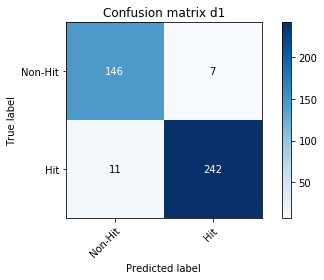

D1: best model accuracy: 0.756098, avg_model_accuracy: 0.598384
D2: best model accuracy: 0.763636, avg_model_accuracy: 0.586935
D3: best model accuracy: 0.716418, avg_model_accuracy: 0.538321


In [23]:
from sklearn import tree
import graphviz

def decision_tree(df_features, df_target):
    clf = tree.DecisionTreeClassifier() 
    n_splits = 10
    kf = KFold(n_splits=n_splits, shuffle=True)
    total_model_acc = 0
    best_model_acc = 0
    for train_idx, test_idx in kf.split(df_features):
        X_train, X_test = df_features.iloc[train_idx], df_features.iloc[test_idx]
        Y_train, Y_test = df_target.iloc[train_idx], df_target.iloc[test_idx]
        df_dt_model = clf.fit(X_train, Y_train)   
        predicted_values = df_dt_model.predict(X_test)
        number_correct_predictions = (Y_test == predicted_values).sum()
        model_acc = float(number_correct_predictions)/len(Y_test)
        if model_acc > best_model_acc:
            best_model = df_dt_model
            best_model_acc = model_acc
        total_model_acc += model_acc
        
    avg_model_acc = float(total_model_acc)/n_splits
   # graph_repr = tree.plot_tree(best_model.fit(df_features, df_target))
    return best_model, best_model_acc, avg_model_acc #, graph_repr

avg_accuracies = [0,0,0]
best_accuracies = [0,0,0]
best_model = [None,None,None]
num_iter = 10

for i in range(num_iter):
    best_model_d1, best_model_acc_d1, avg_model_acc_d1 = decision_tree(d1_features, d1_targets)
    best_model_d2, best_model_acc_d2, avg_model_acc_d2 = decision_tree(d2_features, d2_targets)
    best_model_d3, best_model_acc_d3, avg_model_acc_d3 = decision_tree(d3_features, d3_targets)
    avg_accuracies[0] += avg_model_acc_d1
    avg_accuracies[1] += avg_model_acc_d2 
    avg_accuracies[2] += avg_model_acc_d3
    if best_model_acc_d1 > best_accuracies[0]: 
        best_accuracies[0] = best_model_acc_d1
        best_model[0] = best_model_d1
    if best_model_acc_d2 > best_accuracies[1]: 
        best_accuracies[1] = best_model_acc_d2
        best_model[1] = best_model_d2
    if best_model_acc_d3 > best_accuracies[2]: 
        best_accuracies[2] = best_model_acc_d3
        best_model[2] = best_model_d3
        
    
avg_accuracies = [n/num_iter for n in avg_accuracies]

best_model_prediction = best_model[0].predict(d1_features)
cm = confusion_matrix(best_model_prediction, d1_targets)
plot_confusion_matrix(cm, ["Non-Hit","Hit"], title="Confusion matrix d1")
plt.show()

print("D1: best model accuracy: %f, avg_model_accuracy: %f" % (best_accuracies[0], avg_accuracies[0]))
print("D2: best model accuracy: %f, avg_model_accuracy: %f" % (best_accuracies[1], avg_accuracies[1]))
print("D3: best model accuracy: %f, avg_model_accuracy: %f" % (best_accuracies[2], avg_accuracies[2]))

In [24]:
dot_data = tree.export_graphviz(best_model[0],
                                feature_names=d1_pred.drop('hit', axis=1).keys(),
                                class_names = ['Non-Hit', 'Hit'],
                                filled=True,
                                rounded=True,
                                special_characters=True,
                                out_file=None)
graph = graphviz.Source(dot_data)
graph.render("trees_fs")






'trees_fs.pdf'